In [1]:
# In this notebook we compare different signal samples

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
run="run1"
dm_type = 'fermion'
target_pot=0
signal_pot={}

signal_correction = { "0.01":0.94903385, "0.02":1.03561568, "0.03":1.02326517, "0.04":1.00641579, 
                     "0.05":1.00650082, "0.06":1.01293082, "0.07":1.07433777, 
                     "0.08":1.10175345, "0.09":1.0415591 , "0.10":1.1014797}

if(dm_type == "fermion"):
    signal_pot = { "0.01":3.9e19, "0.02":3.4e+20, "0.03":1.49e+21, 
                  "0.04":5.59e+21, "0.05":1.89e+22, "0.06":6.02e+22,
                  "0.07":1.8e+23, "0.08":5.6e+23, 
                  "0.09":1.2e+24, "0.10":2.9e+24}

else: 
    signal_pot = { "0.01":8.8e+20, "0.02": 9.05e+21, "0.03":4.7e+22, 
                  "0.04":1.8e+23, "0.05":7.7e+23, "0.06":2.7e+24,
                  "0.07":7.9e+24, "0.08":2.34e+25, 
                  "0.09":3.9e+25, "0.10":8.8e+25}

    
if(run=="run1"):
    target_pot = 2.38e20
    
else:
    target_pot = 5.18e20 

    
detvar_uncert = 0.25 
xsec_uncert = 0.2 

In [3]:
# Old vs new

mass = "0.10"
base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_signal/"
df_old = pd.read_csv(base_dir + "dt_overlay_"+ mass + "_CNN_scores_8441_steps.csv")
df_pi0 = pd.read_csv(base_dir +"run1_dt_0.05_pi0_CNN_scores_8441_steps.csv")
#df_pi0_rhc = pd.read_csv("/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_signal/run3_dt_0.1_eta_CNN_scores_8441_steps.csv")
df_eta = pd.read_csv(base_dir +"run1_dt_0.1_eta_CNN_scores_8441_steps.csv")

df_old = df_old.drop_duplicates()
df_old = df_old[df_old['n_tracks'] == 0]
df_old = df_old[df_old['n_vertex'] == 1]

print(len(df_old))
print(len(df_pi0))
print(len(df_eta))
#print(len(df_pi0_rhc))

fraction_old = len(df_old)/len(df_old[df_old['signal_score']>= 0.])
fraction_pi0 = len(df_pi0)/len(df_pi0[df_pi0['signal_score']>= 0.])
#fraction_pi0_rhc = len(df_pi0_rhc)/len(df_pi0_rhc[df_pi0_rhc['signal_score']>= 0.])
fraction_eta = len(df_eta)/len(df_eta[df_eta['signal_score']>= 0.])

df_old=df_old[df_old['signal_score'] >=0.]
df_pi0=df_pi0[df_pi0['signal_score'] >=0.]
#df_pi0_rhc=df_pi0_rhc[df_pi0_rhc['signal_score'] >=0.]
df_eta=df_eta[df_eta['signal_score'] >=0.]

6982
4219
8672


In [4]:
target_pot = 1e21

print("Number of events after 1e21...")
print("\n")


n_events_old = len(df_old)*signal_correction['0.10']*target_pot/signal_pot['0.10']
n_events_pi0 = len(df_pi0)*11.27*fraction_pi0*target_pot/df_pi0['total_pot'][0]
n_events_eta = len(df_eta)*7.66*fraction_eta*target_pot/df_eta['total_pot'][0]
#n_events_pi0_rhc = len(df_pi0_rhc)*11.32*fraction_pi0_rhc*target_pot/df_pi0_rhc['total_pot'][0]
#7.73 for etas in RHC 

print("Old: ", n_events_old)
print("Pi0: ", n_events_pi0)
print("Eta: ", n_events_eta)
#print("Pi0 RHC: ", n_events_pi0_rhc)

Number of events after 1e21...


Old:  2.3902109490000005
Pi0:  298.26874075060806
Eta:  2.5235006955111903


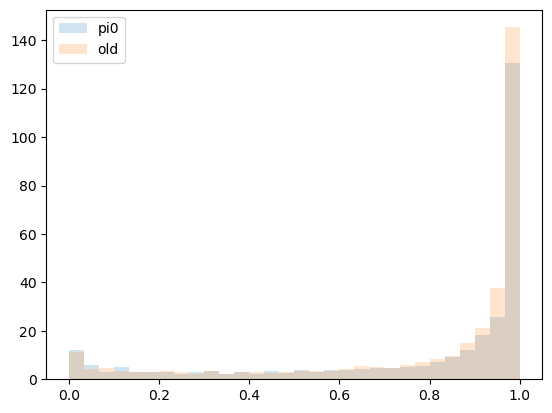

In [5]:
plt.hist(df_pi0['signal_score'],bins=30,alpha=0.2,weights=np.ones(len(df_pi0))*11.27*fraction_pi0*target_pot/df_pi0['total_pot'][0],label="pi0")
#plt.hist(df_eta['signal_score'],bins=30,alpha=0.2,density=True,legend="eta")
plt.hist(df_old['signal_score'],bins=30,alpha=0.2,weights=np.ones(len(df_old))*signal_correction['0.05']*target_pot/signal_pot['0.05'],label="old")
plt.legend()
plt.show()

In [6]:
'''
plt.hist(df_pi0['signal_score'],bins=30,alpha=0.2,weights=np.ones(len(df_pi0))*11.27*fraction_pi0*target_pot/df_pi0['total_pot'][0],label="pi0 FHC")
#plt.hist(df_eta['signal_score'],bins=30,alpha=0.2,density=True,legend="eta")
plt.hist(df_pi0_rhc['signal_score'],bins=30,alpha=0.2,weights=np.ones(len(df_pi0_rhc))*11.36*fraction_pi0_rhc*target_pot/df_pi0_rhc['total_pot'][0],label="pi0 RHC")
plt.legend()
plt.show()'''

'\nplt.hist(df_pi0[\'signal_score\'],bins=30,alpha=0.2,weights=np.ones(len(df_pi0))*11.27*fraction_pi0*target_pot/df_pi0[\'total_pot\'][0],label="pi0 FHC")\n#plt.hist(df_eta[\'signal_score\'],bins=30,alpha=0.2,density=True,legend="eta")\nplt.hist(df_pi0_rhc[\'signal_score\'],bins=30,alpha=0.2,weights=np.ones(len(df_pi0_rhc))*11.36*fraction_pi0_rhc*target_pot/df_pi0_rhc[\'total_pot\'][0],label="pi0 RHC")\nplt.legend()\nplt.show()'